In [6]:
## Set path
import os
from pathlib import Path

current_directory = Path.cwd()
if current_directory.name == "MT":
    # This means that the notebook is run from the main anomalib directory.
    root_directory = current_directory.parent
elif current_directory.name == "anomalib":
    # This means that the notebook is run from the main anomalib directory.
    root_directory = current_directory

os.chdir(root_directory)
root_directory

PosixPath('/home/wueesmat/MT/anomalib')

In [7]:
print("test")

test


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# ## Load results
# load_folder = "./results/Patchcore/"#"./results/Stfpm/" # 
# #name = "Patchcore_all_categories_cont_max_0.15_runs_10_20240331.npy"
# name = "Patchcore_all_categories_cont_max_0.15_runs_05_sampling_ratio_0.01_20240404.npy"
# 
# #"Patchcore_cont_max_0.15_20240328.npy" # "Patchcore_20240328.npy"# 
# file_path = os.path.join(load_folder, name)
# file_path
# 
# # Load the saved array
# performance_arr = np.load(file_path)
# performance_blind_arr = performance_arr

In [10]:
## Load results
load_folder = "./results/Patchcore/"#"./results/Stfpm/" # 
#name = "Patchcore_all_categories_cont_max_0.15_runs_10_20240331.npy"
#name = "Patchcore_20240402_no_refinement.npy"
#name = "Patchcore_all_categories_cont_max_0.15_runs_05_sampling_ratio_0.01_20240411_no_refinement.npy"
name = "20240417_Patchcore_all_categories_cont_max_0.15_runs_05_sampling_ratio_0.01_no_refinement.npy"

#"Patchcore_cont_max_0.15_20240328.npy" # "Patchcore_20240328.npy"# 
file_path = os.path.join(load_folder, name)
file_path

# Load the saved array
performance_arr = np.load(file_path)
performance_blind_arr = performance_arr

In [11]:
## Load results
load_folder = "./results/Patchcore/"#"./results/Stfpm/" # 
#name = "Patchcore_all_categories_cont_max_0.15_runs_10_20240331.npy"
#name = "Patchcore_20240402_simple_refinement.npy"
#name = "Patchcore_all_categories_cont_max_0.15_runs_05_sampling_ratio_0.01_20240411_simple_refinement.npy"
name = "20240417_Patchcore_all_categories_cont_max_0.15_runs_05_sampling_ratio_0.01_simple_refinement.npy"

#"Patchcore_cont_max_0.15_20240328.npy" # "Patchcore_20240328.npy"# 
file_path = os.path.join(load_folder, name)
file_path

# Load the saved array
performance_refined_arr = np.load(file_path)

In [17]:
np.mean(np.mean(performance_arr, axis=2), axis=0)

array([0.98998919, 0.98477333, 0.9825247 , 0.97887155])

In [9]:
np.std(np.mean(performance_arr, axis=2), axis=0)

array([0.00108209, 0.00090037, 0.00246265, 0.00487667])

In [13]:
def plot_performance_blind_vs_refined_all_categories(performance_blind_arr, 
                                                     performance_refined_arr,
                                                   ratio_labels=np.array([0, 5, 10, 15]), 
                                                   category_labels = np.array(["Carpet", "Grid", "Leather", "Tile", "Wood", "Bottle", "Cable", "Capsule", "Hazelnut", "Metal nut",  "Pill",  "Screw",  "Toothbrush", "Transistor",  "Zipper"])
                                                   ):
    """Plot performance as a function of the anomaly ratio.
    Args:
        results_arr (numpy array): (runs, contamination ratios, categories)
        ratio_labels (numpy array): 
            Defaults to np.array([0, 5, 10, 15)
        category_labels (numpy array): 
            Defaults to np.array(["Carpet", "Grid", "Leather", "Tile", "Wood", "Bottle", "Cable", "Capsule", "Hazelnut", "Metal nut",  "Pill",  "Screw",  "Toothbrush", "Transistor",  "Zipper"])
    """

    # Plot setttings
    fontsize = 8
    markersize = 4

    # Prepare data
    ratios = ratio_labels
    performance_blind_mean = np.mean(np.mean(performance_blind_arr, axis=2), axis=0)
    performance_blind_std = np.std(np.mean(performance_blind_arr, axis=2), axis=0)
    performance_refined_mean = np.mean(np.mean(performance_refined_arr, axis=2), axis=0)
    performance_refined_std = np.std(np.mean(performance_refined_arr, axis=2), axis=0)

    # Plot data
    fig, axs = plt.subplots(2, 1, figsize=(4,6.25), constrained_layout=True)
    axs[0].plot(ratios, performance_blind_mean, marker="o", label="Blind", color='C0', markersize = markersize, linestyle='dotted')
    axs[0].fill_between(ratios, performance_blind_mean-performance_blind_std, performance_blind_mean+performance_blind_std, color='C0', alpha=0.2, linewidth=0.0)
    axs[0].plot(ratios, performance_refined_mean, marker="o", label="Refined", color='C1', markersize = markersize, linestyle='dotted')
    axs[0].fill_between(ratios, performance_refined_mean-performance_refined_std, performance_refined_mean+performance_refined_std, color='C1', alpha=0.2, linewidth=0.0)

    # Format plot
    axs[0].grid()
    axs[0].set_title("All categories", fontsize=fontsize, fontweight="bold")
    axs[0].legend(fontsize=fontsize)
    axs[0].set_xlim([-0.5, 15.5])
    axs[0].set_ylim([0.9, 1.01])
    axs[0].set_xlabel("Anomaly ratio [%]", fontsize=fontsize)
    axs[0].set_ylabel("AUROC [-]", fontsize=fontsize)
    axs[0].xaxis.set_tick_params(labelsize=fontsize)
    axs[0].yaxis.set_tick_params(labelsize=fontsize)


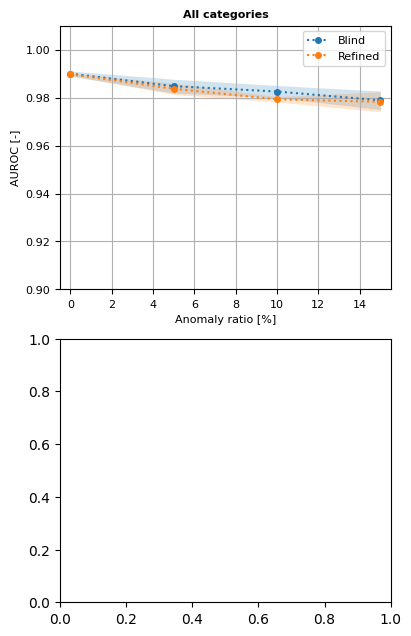

In [14]:
plot_performance_blind_vs_refined_all_categories(performance_blind_arr, performance_refined_arr)

In [15]:
def plot_performance_blind_vs_refined_each_category(performance_blind_arr, 
                                                    performance_refined_arr,
                                                   ratio_labels=np.array([0, 5, 10, 15]), 
                                                   category_labels = np.array(["Carpet", "Grid", "Leather", "Tile", "Wood", "Bottle", "Cable", "Capsule", "Hazelnut", "Metal nut",  "Pill",  "Screw",  "Toothbrush", "Transistor",  "Zipper"])
                                                   ):
    """Plot performance as a function of the anomaly ratio.
    Args:
        results_arr (numpy array): (runs, contamination ratios, categories)
        ratio_labels (numpy array): 
            Defaults to np.array([0, 5, 10, 15)
        category_labels (numpy array): 
            Defaults to np.array(["Carpet", "Grid", "Leather", "Tile", "Wood", "Bottle", "Cable", "Capsule", "Hazelnut", "Metal nut",  "Pill",  "Screw",  "Toothbrush", "Transistor",  "Zipper"])
    """

    # Plot setttings
    fontsize = 8
    markersize = 4
    n_col = 5

    # Prepare plots
    fig, axs = plt.subplots(int(performance_blind_arr.shape[2]/n_col), n_col, figsize=(8*n_col/3, 12*3/n_col), constrained_layout=True)

    # Prepare data
    ratios = ratio_labels

    
    for category_idx in np.arange(category_labels.shape[0]):

        # Prepare data per category
        ratios = ratio_labels
        performance_blind_mean = np.mean(performance_blind_arr[:,:,category_idx], axis=0)
        performance_blind_std = np.std(performance_blind_arr[:,:,category_idx], axis=0)
        performance_refined_mean = np.mean(performance_refined_arr[:,:,category_idx], axis=0)
        performance_refined_std = np.std(performance_refined_arr[:,:,category_idx], axis=0)

        sx = int(np.mod(category_idx, n_col))
        sy = int(np.floor(category_idx/n_col))

        # Plot data
        axs[sy,sx].plot(ratios, performance_blind_mean, marker="o", label="Blind", color='C0', markersize = markersize, linestyle='dotted')
        axs[sy,sx].fill_between(ratios, performance_blind_mean-performance_blind_std, performance_blind_mean+performance_blind_std, color='C0', alpha=0.2, linewidth=0.0)
        axs[sy,sx].plot(ratios, performance_refined_mean, marker="o", label="Refined", color='C1', markersize = markersize, linestyle='dotted')
        axs[sy,sx].fill_between(ratios, performance_refined_mean-performance_refined_std, performance_refined_mean+performance_refined_std, color='C1', alpha=0.2, linewidth=0.0)

        # Format plot
        axs[sy,sx].grid()
        axs[sy,sx].set_title(category_labels[category_idx], fontsize=fontsize, fontweight="bold")
        axs[sy,sx].legend(fontsize=fontsize, loc="lower left")
        axs[sy,sx].set_xlim([-0.5, 15.5])
        axs[sy,sx].set_ylim([0.9, 1.01])
        axs[sy,sx].set_xlabel("Anomaly ratio [%]", fontsize=fontsize)
        axs[sy,sx].set_ylabel("AUROC [-]", fontsize=fontsize)
        axs[sy,sx].xaxis.set_tick_params(labelsize=fontsize)
        axs[sy,sx].yaxis.set_tick_params(labelsize=fontsize)

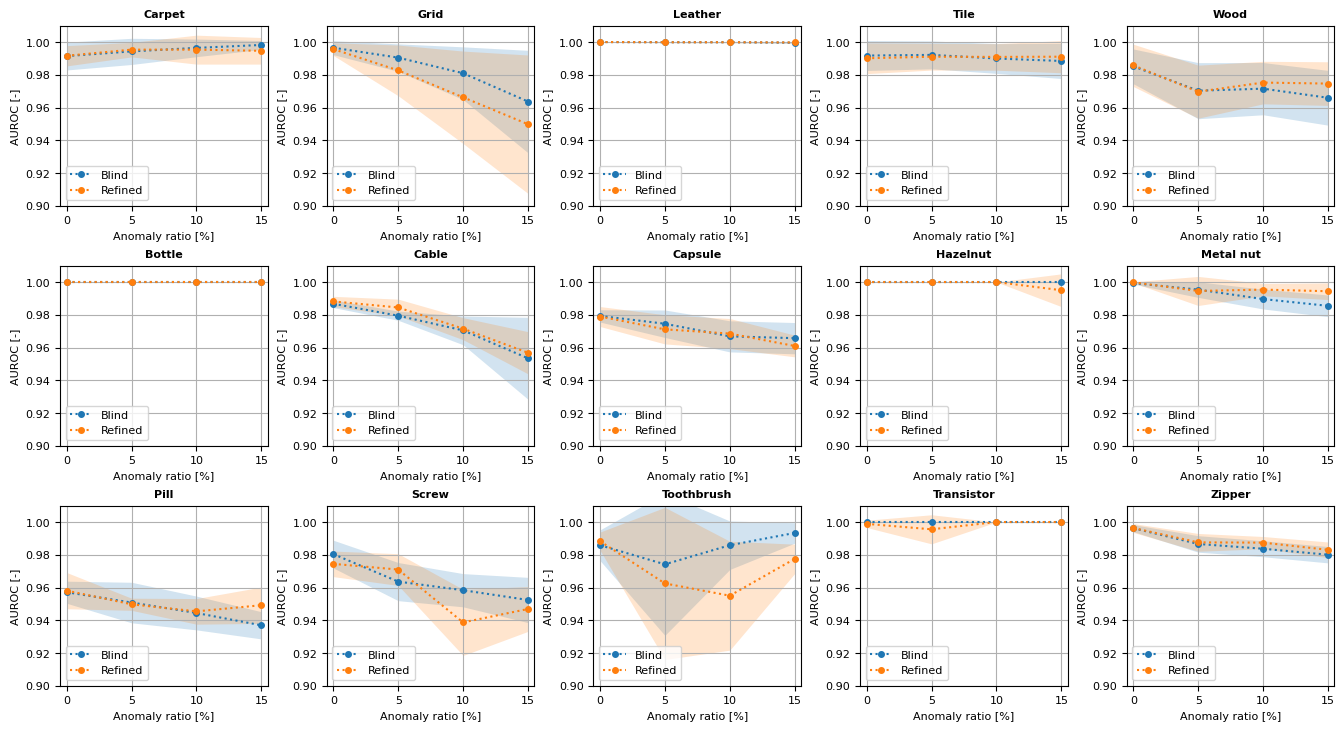

In [16]:
plot_performance_blind_vs_refined_each_category(performance_blind_arr, performance_refined_arr)

In [7]:
def plot_performance_vs_contamination_all_categories(performance_arr, 
                                                   ratio_labels=np.array([0, 5, 10, 15]), 
                                                   category_labels = np.array(["Carpet", "Grid", "Leather", "Tile", "Wood", "Bottle", "Cable", "Capsule", "Hazelnut", "Metal nut",  "Pill",  "Screw",  "Toothbrush", "Transistor",  "Zipper"])
                                                   ):
    """Plot performance as a function of the anomaly ratio.
    Args:
        results_arr (numpy array): (runs, contamination ratios, categories)
        ratio_labels (numpy array): 
            Defaults to np.array([0, 5, 10, 15)
        category_labels (numpy array): 
            Defaults to np.array(["Carpet", "Grid", "Leather", "Tile", "Wood", "Bottle", "Cable", "Capsule", "Hazelnut", "Metal nut",  "Pill",  "Screw",  "Toothbrush", "Transistor",  "Zipper"])
    """

    # Plot setttings
    fontsize = 8
    markersize = 4

    # Prepare data
    ratios = ratio_labels
    performance_mean = np.mean(np.mean(performance_arr, axis=2), axis=0)
    performance_std = np.std(np.mean(performance_arr, axis=2), axis=0)

    # Plot data
    fig, axs = plt.subplots(2, 1, figsize=(4,6.25), constrained_layout=True)
    axs[0].plot(ratios, performance_mean, marker="o", label="PatchCore", color='C0', markersize = markersize, linestyle='dotted')
    axs[0].fill_between(ratios, performance_mean-performance_std, performance_mean+performance_std, color='C0', alpha=0.2, linewidth=0.0)
    
    # Format plot
    axs[0].grid()
    axs[0].set_title("All categories", fontsize=fontsize, fontweight="bold")
    axs[0].legend(fontsize=fontsize)
    axs[0].set_xlim([-0.5, 15.5])
    axs[0].set_ylim([0.9, 1.01])
    axs[0].set_xlabel("Anomaly ratio [%]", fontsize=fontsize)
    axs[0].set_ylabel("AUROC [-]", fontsize=fontsize)
    axs[0].xaxis.set_tick_params(labelsize=fontsize)
    axs[0].yaxis.set_tick_params(labelsize=fontsize)


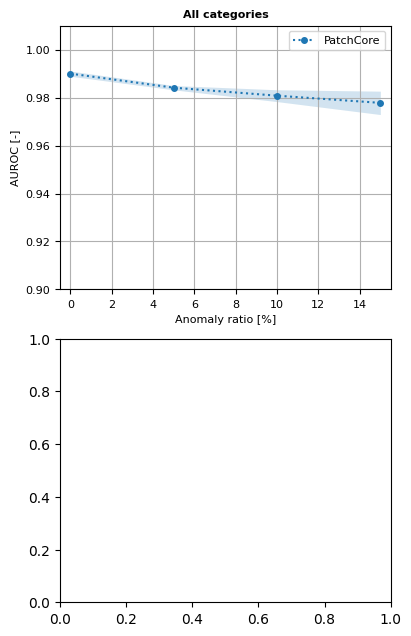

In [8]:
plot_performance_vs_contamination_all_categories(performance_arr)

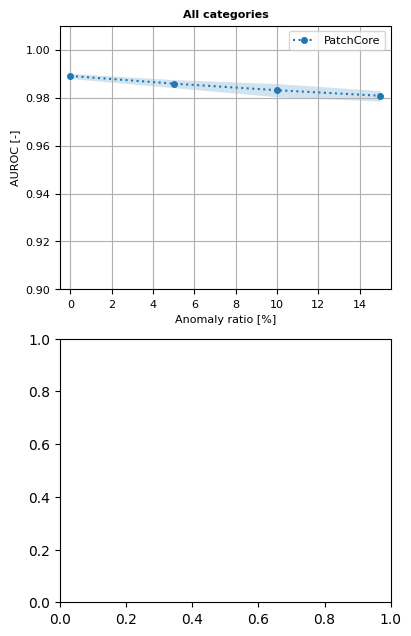

In [98]:
plot_performance_vs_contamination_all_categories(performance_arr)

In [9]:
def plot_performance_vs_contamination_each_category(performance_arr, 
                                                   ratio_labels=np.array([0, 5, 10, 15]), 
                                                   category_labels = np.array(["Carpet", "Grid", "Leather", "Tile", "Wood", "Bottle", "Cable", "Capsule", "Hazelnut", "Metal nut",  "Pill",  "Screw",  "Toothbrush", "Transistor",  "Zipper"])
                                                   ):
    """Plot performance as a function of the anomaly ratio.
    Args:
        results_arr (numpy array): (runs, contamination ratios, categories)
        ratio_labels (numpy array): 
            Defaults to np.array([0, 5, 10, 15)
        category_labels (numpy array): 
            Defaults to np.array(["Carpet", "Grid", "Leather", "Tile", "Wood", "Bottle", "Cable", "Capsule", "Hazelnut", "Metal nut",  "Pill",  "Screw",  "Toothbrush", "Transistor",  "Zipper"])
    """

    # Plot setttings
    fontsize = 8
    markersize = 4
    n_col = 5

    # Prepare plots
    fig, axs = plt.subplots(int(performance_arr.shape[2]/n_col), n_col, figsize=(8*n_col/3, 12*3/n_col), constrained_layout=True)

    # Prepare data
    ratios = ratio_labels

    
    for category_idx in np.arange(category_labels.shape[0]):

        # Prepare data per category
        ratios = ratio_labels
        performance_mean = np.mean(performance_arr[:,:,category_idx], axis=0)
        performance_std = np.std(performance_arr[:,:,category_idx], axis=0)


        sx = int(np.mod(category_idx, n_col))
        sy = int(np.floor(category_idx/n_col))

        # Plot data
        axs[sy,sx].plot(ratios, performance_mean, marker="o", label="PatchCore", color='C0', markersize = markersize, linestyle='dotted')
        axs[sy,sx].fill_between(ratios, performance_mean-performance_std, performance_mean+performance_std, color='C0', alpha=0.2, linewidth=0.0)
        
        # Format plot
        axs[sy,sx].grid()
        axs[sy,sx].set_title(category_labels[category_idx], fontsize=fontsize, fontweight="bold")
        axs[sy,sx].legend(fontsize=fontsize, loc="lower left")
        axs[sy,sx].set_xlim([-0.5, 15.5])
        axs[sy,sx].set_ylim([0.9, 1.01])
        axs[sy,sx].set_xlabel("Anomaly ratio [%]", fontsize=fontsize)
        axs[sy,sx].set_ylabel("AUROC [-]", fontsize=fontsize)
        axs[sy,sx].xaxis.set_tick_params(labelsize=fontsize)
        axs[sy,sx].yaxis.set_tick_params(labelsize=fontsize)
        
        

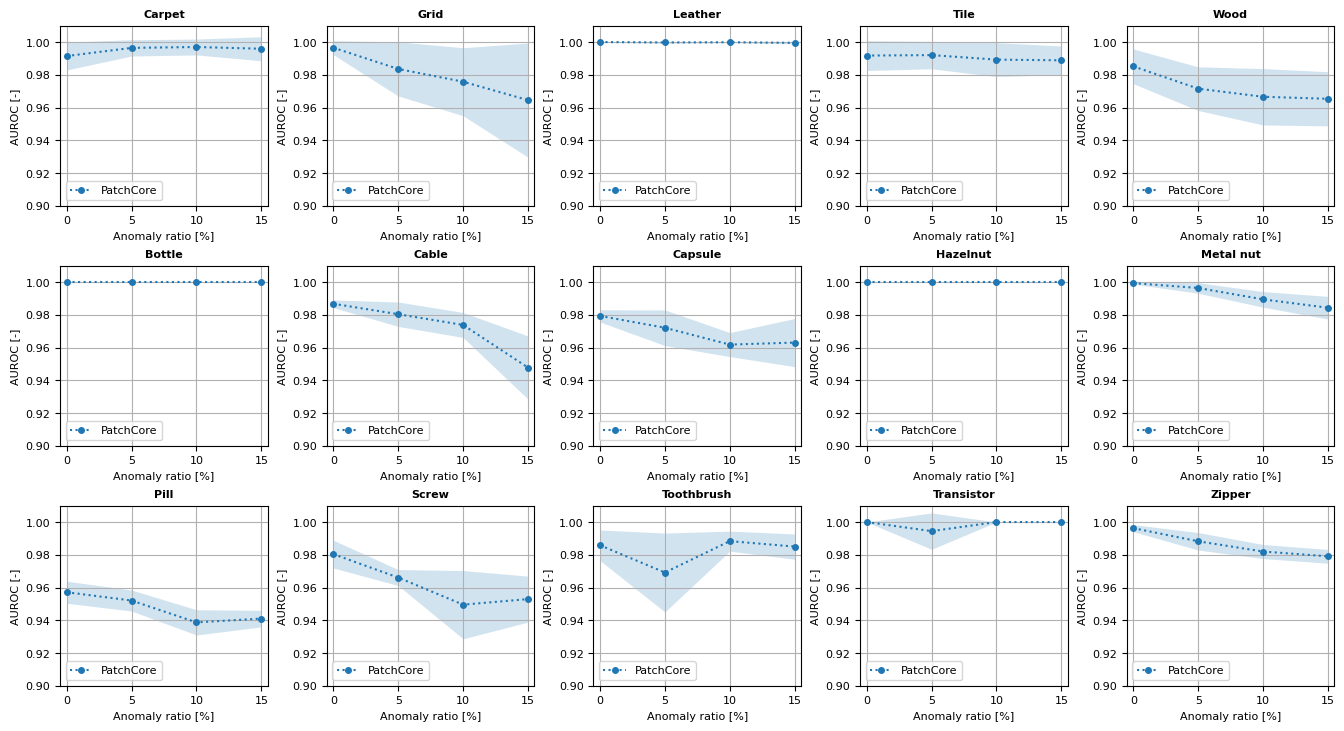

In [10]:
plot_performance_vs_contamination_each_category(performance_arr)

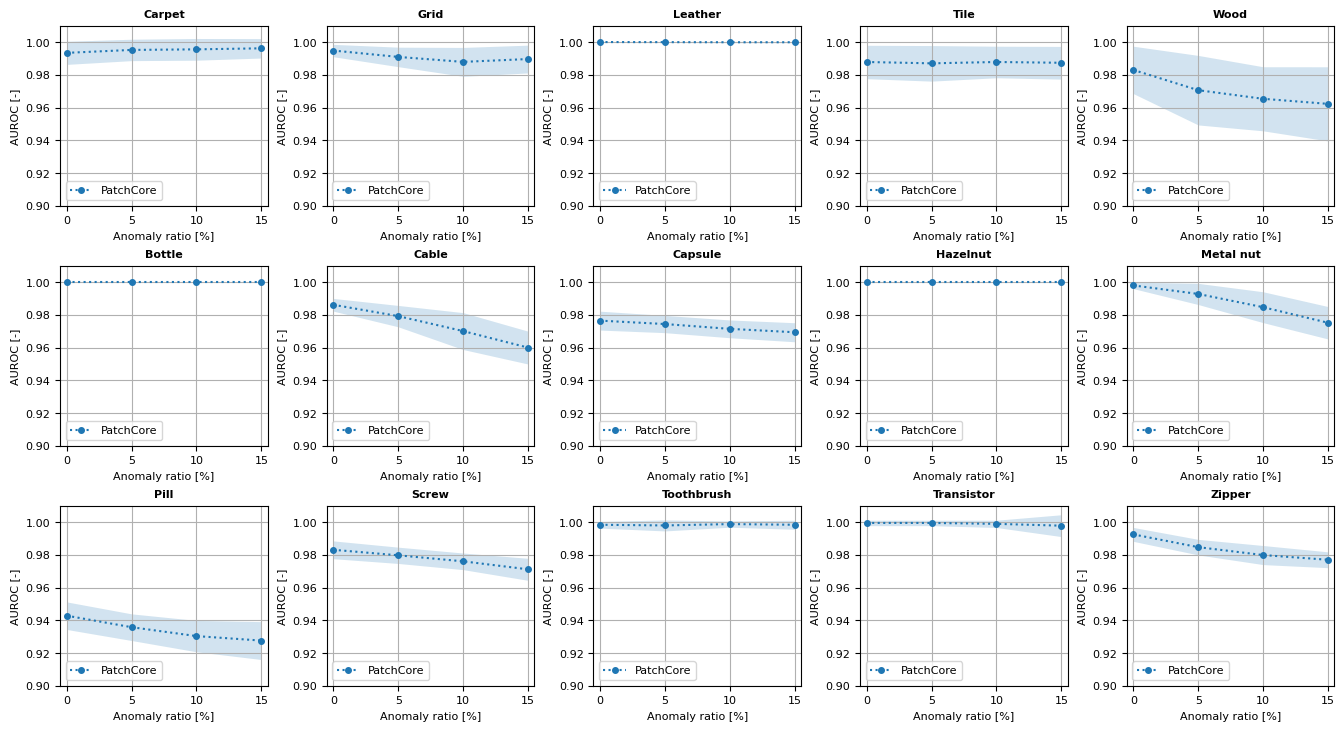

In [100]:
plot_performance_vs_contamination_each_category(performance_arr)

In [56]:
## Identify 
AUROC_delta_mean = np.mean((results_array[:,3,:] - results_array[:,0,:]), axis=0)
AUROC_delta_std = np.std((results_array[:,3,:] - results_array[:,0,:]), axis=0)
print(AUROC_delta_mean)
print(AUROC_delta_std)


[ 2.76787281e-03 -5.19485474e-03 -1.27553940e-04 -4.82124090e-04
 -2.07430601e-02  0.00000000e+00 -2.61548698e-02 -7.10348487e-03
  3.57627869e-08 -2.28099465e-02 -1.52209342e-02 -1.19241178e-02
  8.34465027e-08 -1.66666508e-03 -1.55032396e-02]
[3.46837101e-03 8.16794900e-03 2.55107880e-04 2.02087804e-03
 1.82662812e-02 0.00000000e+00 1.02368694e-02 5.78488107e-03
 5.46285593e-08 9.46054815e-03 6.81920471e-03 8.60093026e-03
 3.22746765e-03 4.99999523e-03 1.77649744e-03]


<BarContainer object of 15 artists>

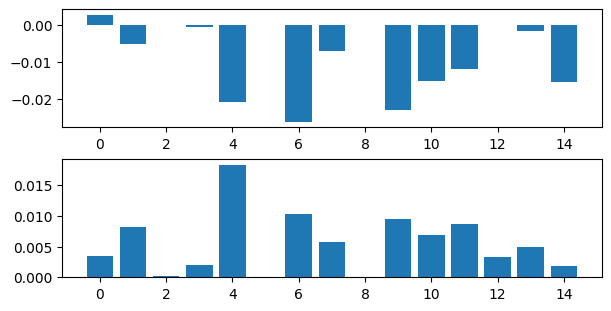

In [57]:
fig, axs = plt.subplots(2, 1, figsize=(6, 3), constrained_layout=True)
axs[0].bar(np.arange(AUROC_delta_mean.shape[0]), AUROC_delta_mean)
axs[1].bar(np.arange(AUROC_delta_std.shape[0]), AUROC_delta_std)

In [ ]:
category_arr = np.array(["carpet", "grid", "leather", "tile", "wood", "bottle", "cable", "capsule", "hazelnut", "metal_nut", "pill", "screw", "toothbrush", "transistor", "zipper"])


In [60]:
np.argsort(AUROC_delta_mean)

array([ 6,  9,  4, 14, 10, 11,  7,  1, 13,  3,  2,  5,  8, 12,  0])

In [58]:
category_dict = {0: "Carpet",
                  1: "Grid", 
                  2: "Leather",
                  3: "Tile", 
                  4: "Wood",
                  5: "Bottle", 
                  6: "Cable",
                  7: "Capsule", 
                  8: "Hazelnut",
                  9: "Metal nut", 
                  10: "Pill",
                  11: "Screw", 
                  12: "Toothbrush",
                  13: "Transistor", 
                  14: "Zipper"}


In [8]:
np.mean(loaded_array, axis=0).shape

(4, 15)

In [9]:
np.mean(np.mean(loaded_array, axis=0), axis=1)

array([0.98903452, 0.98582005, 0.98308506, 0.980757  ])

In [12]:
np.mean(loaded_array, axis=0).shape

(4, 15)

In [16]:
AUROC_decrease = np.mean(loaded_array, axis=0)[3,:] - np.mean(loaded_array, axis=0)[0,:]

In [22]:
AUROC_decrease

array([ 2.76787281e-03, -5.19485474e-03, -1.27553940e-04, -4.82124090e-04,
       -2.07430601e-02,  0.00000000e+00, -2.61548698e-02, -7.10348487e-03,
        3.57627868e-08, -2.28099465e-02, -1.52209342e-02, -1.19241178e-02,
        8.34465027e-08, -1.66666508e-03, -1.55032396e-02])

In [21]:
np.sort(AUROC_decrease)

array([-2.61548698e-02, -2.28099465e-02, -2.07430601e-02, -1.55032396e-02,
       -1.52209342e-02, -1.19241178e-02, -7.10348487e-03, -5.19485474e-03,
       -1.66666508e-03, -4.82124090e-04, -1.27553940e-04,  0.00000000e+00,
        3.57627868e-08,  8.34465027e-08,  2.76787281e-03])

In [ ]:
"cable"



In [ ]:
category_arr = np.array(["carpet", "grid", "leather", "tile", "wood", "bottle", "cable", "capsule", "hazelnut", "metal_nut", "pill", "screw", "toothbrush", "transistor", "zipper"])#np.array(["carpet"])#np.array(["carpet", "grid"]) #
